The number of pounds of steam used per month at a plant is thought to be related to the average monthly ambient temperature. The past year’s usages and temperatures follow.

In [1]:
import numpy as np
import pandas as pd

dat212 = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")
display(dat212)

,Month,Temperature,Usage/l000
0,Jan.,21,185.79
1,Jul.,68,621.55
2,Feb.,24,214.47
3,Aug.,74,675.06
4,Mar.,32,288.03
5,Sep.,62,562.03
6,Apr.,47,424.84
7,Oct.,50,452.93
8,May,50,454.68
9,Nov.,41,369.95


**b. Test for significance of regression.**

There are two tests we can use to test the significance of the whole model, the t and F tests. To apply the t test, we can use summary data from the linear model or calculate the t statistic manually and compare it to the t critical value for the degrees of freedom and 95% confidence target:

 * t_critical value (alpha = 0.05, df = n-2 = 10): 2.2281388519649385, 
 * t_statistic for our data: 272.254998757909
 
t_statistic > t_critical, therefore we <u>reject H_0</u> and conclude that <u>number of pounds of steam used per month is significantly correlated to the average monthly ambient temperature</u>.

In [1]:
# calculate two-tail t critical value for alpha=0.05, degrees of freedom=n-2=10
from scipy import stats
display(stats.t.ppf(q=1-.05/2, df=10))

# calculate t statistic for our data set using the linear model
import numpy as np
import pandas as pd
import statsmodels.api as sm

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")

# Creating X and y
X = dataset['Temperature'].values
y = dataset['Usage/l000']

# Add a list of ones with length of X to identify intercept terms in linear model
x = sm.add_constant(X)
lm212 = sm.OLS(y,x).fit()
# To list all fields in lm212 model display(dir(lm212))
display(lm212.params)
display(lm212.tvalues[1])

# calculate y_hat estimate, sum of squares error, variance, and sum of squares x^2
yhat = 9.208468*X - 6.332087
SS_error=sum(np.square(np.subtract(y,yhat)))
variance_y=SS_error/10
SSxx = sum(np.square(np.subtract(X,np.average(X))))

# calculate t statistic for our data set manually
t_stat = 9.208468/(np.sqrt(variance_y/SSxx))
print("t statistic: ")
display(t_stat)

2.2281388519649385

array([[ 1., 21.],
       [ 1., 68.],
       [ 1., 24.],
       [ 1., 74.],
       [ 1., 32.],
       [ 1., 62.],
       [ 1., 47.],
       [ 1., 50.],
       [ 1., 50.],
       [ 1., 41.],
       [ 1., 59.],
       [ 1., 30.]])

const   -6.332087
x1       9.208468
dtype: float64

272.254998757909

t statistic: 


272.2550042226885

To apply the F test, we use the F value calculated in the linear model or calculate the F statistic for our model manually and compare it to the critical F value given our degrees of freedom:

 * F_critical value (alpha = 0.05, df = n-2 = 10): 4.964603 
 * F_statistic for our data: 74122.78
 
F_statistic > F_critical, therefore we <u>reject H_0</u> and conclude that <u>number of pounds of steam used per month is significantly correlated to the average monthly ambient temperature</u>.

In [15]:
# calculate one-sided F critical value for alpha=0.05, degrees of freedom=n-2=10
from scipy import stats
display(stats.f.ppf(q=1-0.05, dfn=1, dfd=10))

# calculate F-statistic for our data set using the linear model
import pandas as pd
import statsmodels.api as sm

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")

# Creating X and y
X = dataset['Temperature']
y = dataset['Usage/l000']

x = sm.add_constant(X)
lm212 = sm.OLS(y,x).fit()
# To list all fields in lm212 model display(dir(lm212))
display(lm212.params)

# calculate F statistic for our data set using the linear model
display(lm212.fvalue)

# calculate y_hat estimate, sum of squares error, and sum of squares regression (response)
yhat = 9.208468*X - 6.332087
SS_error=sum(np.square(np.subtract(y,yhat)))
SS_regression=sum(np.square(np.subtract(yhat,np.average(y))))

# calculate F-statistic for our data set manually
f_stat=(SS_regression/1)/(SS_error/10)
print("F statistic: ")
display(f_stat)

4.9646027437307145

const         -6.332087
Temperature    9.208468
dtype: float64

74122.78434866904

F statistic: 


74122.78732429638

**c. Plant management believes that an increase in average ambient temperature of 1 degree will increase average monthly steam consumption by 10,000 lb. Do the data support this statement?**

This question suggests Beta_1 is 10 for the population, and asks us to test this against the Beta_1_hat we get from the data. The t test statistics are:

 * t_critical value (alpha = 0.05, df = n-2 = 10): 2.2281388519649385
 * t_statistic for Beta_1 = 10: -23.40215587352691
 
|t_statistic| > t_critical, therefore we <u>reject H_0</u> and conclude that <u>the slope is not 10</u>.

In [5]:
# calculate two-tail t critical value for alpha=0.05, degrees of freedom=n-2=10
from scipy import stats
display(stats.t.ppf(q=1-.05/2, df=10))

# calculate t statistic for our data set using the linear model
import numpy as np

beta_1_hat = 9.20847 # least squares fit coefficient
beta_1_0 = 10 # hypothesized coefficient from plant management

# calculate y_hat estimate, sum of squares error, variance, and sum of squares x^2
yhat = 9.208468*X - 6.332087
SS_error=sum(np.square(np.subtract(y,yhat)))
variance_y=SS_error/10
SSxx = sum(np.square(np.subtract(X,np.average(X))))

# calculate t statistic that compares coefficients manually
t_stat = (beta_1_hat-beta_1_0)/(np.sqrt(variance_y/SSxx))
print("t statistic: ")
display(t_stat)

2.2281388519649385

t statistic: 


-23.40215587352691

**d. Construct a 99% confidence and prediction intervals on steam usage in a month with average ambient temperature of 58°.**

 * The Confidence Interval (E[y|58]) = (525.594,529.9244)
 * The Prediction Interval (y_i,new) = (521.2238,534.2945)

In [33]:
# calculate two-tail t critical value for alpha=0.05, degrees of freedom=n-2=10
from scipy import stats
t_99=stats.t.ppf(q=1-.01/2, df=10)
display(t_99)

# calculate t-statistic for our data set using the linear model
import numpy as np
import pandas as pd
import statsmodels.api as sm

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")

# Creating X and y
X = dataset['Temperature']
y = dataset['Usage/l000']

x = sm.add_constant(X)
lm212 = sm.OLS(y,x).fit()
# To list all fields in lm212 model display(dir(lm212))
display(lm212.params)

# calculate y_hat estimate, sum of squares error, variance, and sum of squares x^2
yhat_58 = 9.208468*58 - 6.332087
yhat = 9.208468*X - 6.332087
SS_error=sum(np.square(np.subtract(y,yhat)))
variance_y=SS_error/10
SSxx = sum(np.square(np.subtract(X,np.average(X))))

#mean squared error is equal to variance of y, manually calculate confidence interval
lower_confidence = yhat_58-t_99*(np.sqrt(variance_y*(1/12+np.square(58-np.average(X))/SSxx)))
upper_confidence = yhat_58+t_99*(np.sqrt(variance_y*(1/12+np.square(58-np.average(X))/SSxx)))
display(lower_confidence)
display(upper_confidence)

#use linear model to automatically calculate confidence
y_prd = lm212.get_prediction(sm.add_constant([0,58])) #IMPORTANT: input >1 predictor values
display(y_prd.summary_frame(alpha = 0.01).T[1])

3.169272667175838

const         -6.332087
Temperature    9.208468
dtype: float64

525.593841143829

529.924272856171

mean             527.759047
mean_se            0.683190
mean_ci_lower    525.593831
mean_ci_upper    529.924262
obs_ci_lower     521.223718
obs_ci_upper     534.294375
Name: 1, dtype: float64

In [ ]:
Plot the data adding a fitted regression line, 95% confidence interval, and 95% prediction interval (assume the error is normally distributed).

,Temperature,Usage
0,21,185.79
1,68,621.55
2,24,214.47
3,74,675.06
4,32,288.03
5,62,562.03
6,47,424.84
7,50,452.93
8,50,454.68
9,41,369.95


Intercept     -6.332087
Temperature    9.208468
dtype: float64

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,187.045737,1.029241,184.752446,189.339029,182.141399,191.950076
1,619.843725,0.918840,617.796423,621.891027,615.049478,624.637971
2,214.671141,0.945834,212.563692,216.778590,209.850903,219.491379
3,675.094532,1.086554,672.673538,677.515525,670.129195,680.059868
4,288.338883,0.745641,286.677492,290.000275,283.696301,292.981466
5,564.592918,0.768310,562.881017,566.304819,559.932021,569.253815
6,426.465901,0.561909,425.213889,427.717912,421.953597,430.978204
7,454.091304,0.573995,452.812364,455.370244,449.571454,458.611154
8,454.091304,0.573995,452.812364,455.370244,449.571454,458.611154
9,371.215094,0.591660,369.896793,372.533394,366.683949,375.746238


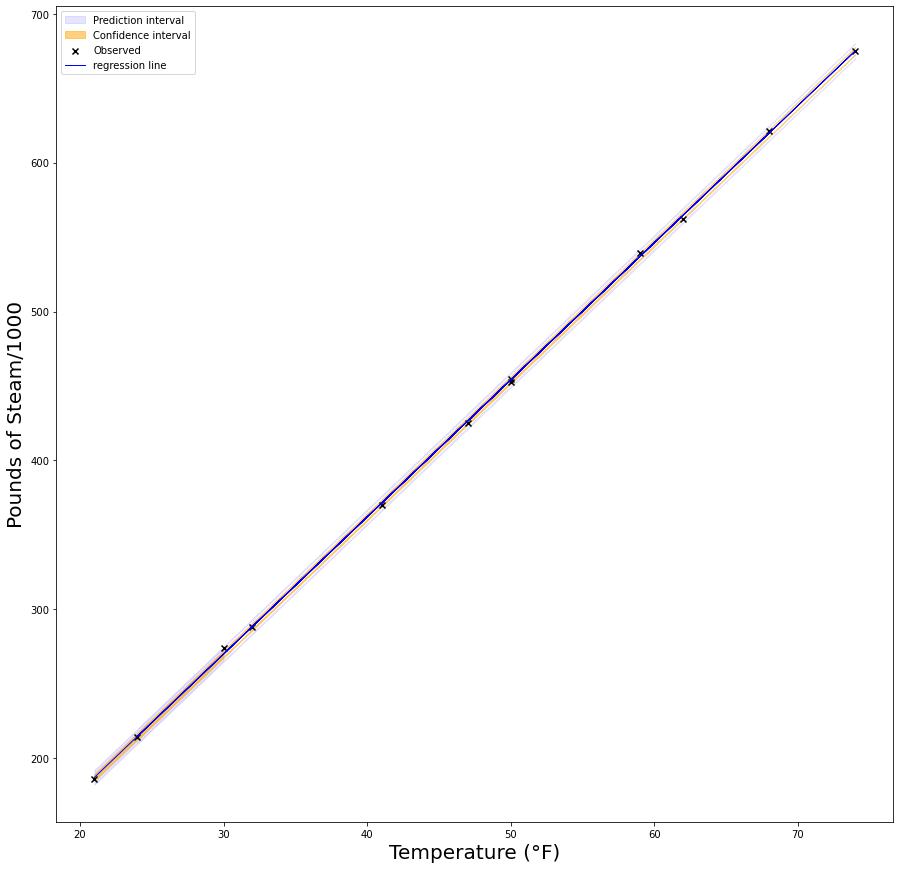

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")

# Creating X and y
X = dataset['Temperature']
y = dataset['Usage/l000']
dat212 = pd.DataFrame(X).join(pd.DataFrame(y))
# Change the column names
dat212.columns =['Temperature', 'Usage']
display(dat212)

#Calculate 95% confidence and prediction intervals
model = sm.formula.ols('Usage ~ Temperature', dat212)
lm212 = model.fit()
display(lm212.params)
alpha = 0.05
predictions = lm212.get_prediction(dat212).summary_frame(alpha)
display(predictions)

#Plot confidence and prediction intervals as bottom layer
plt.figure(figsize=(15, 15))
plt.fill_between(dat212['Temperature'], predictions['obs_ci_lower'], predictions['obs_ci_upper'], alpha=.1, label='Prediction interval', color='blue')
plt.fill_between(dat212['Temperature'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], alpha=.5, label='Confidence interval',color='orange')

#plots the data points
plt.scatter(X,y,label='Observed', marker='x', color='black')

#Create and plot the regression line
yhat = 9.2085*X - 6.3321
plt.plot(X, yhat, lw=1, c='blue', label = 'regression line')

#Add labels and legend last
plt.xlabel('Temperature (°F)', fontsize = 20)
plt.ylabel('Pounds of Steam/1000', fontsize = 20)
plt.legend()

plt.show()